AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'titanic.csv')

print(df.head(10).to_string())
print(df.tail(20).to_string())

   PassengerId Survived  Pclass                                                 Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1        0       3                              Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171     7.25   NaN        S
1            2        1       1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3        1       3                               Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282    7.925   NaN        S
3            4        1       1         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803     53.1  C123        S
4            5        0       3                             Allen, Mr. William Henry    male  35.0      0      0            373450     8.05   NaN        S
5            6        0       3                                     Mo

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.836071,14.526497,1.102743,0.806057
min,1.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000


AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

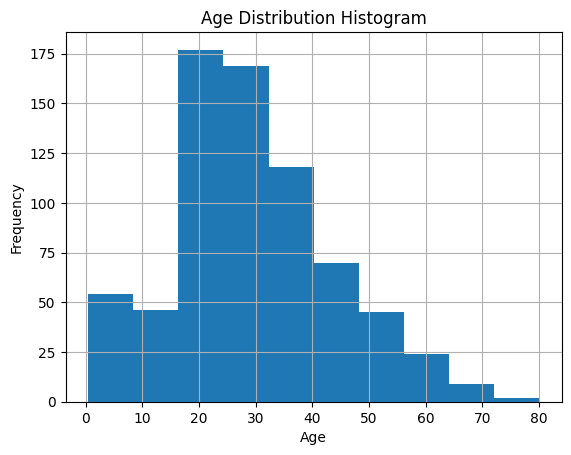

In [6]:
plt.hist(df['Age'])
plt.title('Age Distribution Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [7]:
df['Age'].mean()

np.float64(29.69911764705882)

In [8]:
df['Age'].median()

np.float64(28.0)

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [11]:
df = df.dropna()
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
df['Fare'] = df['Fare'].map(lambda x: x.strip('$'))
df['Fare'] = df['Fare'].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.3+ KB


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

In [14]:
df_mean_fare_by_pclass = df.groupby('Pclass')['Fare'].mean()
df_mean_fare_by_pclass

Pclass
1    84.193516
2    20.662183
3    13.675550
Name: Fare, dtype: float64

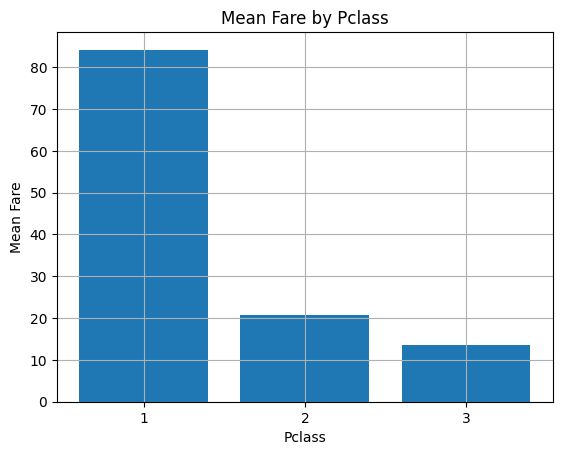

In [15]:
plt.bar(df_mean_fare_by_pclass.index.astype(str), df_mean_fare_by_pclass.values)
plt.title('Mean Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Mean Fare')
plt.grid()
plt.show()

In [16]:
df_mean_fare_by_sex = df.groupby('Sex')['Fare'].mean()
df_mean_fare_by_sex

Sex
female    44.252124
male      25.523893
Name: Fare, dtype: float64

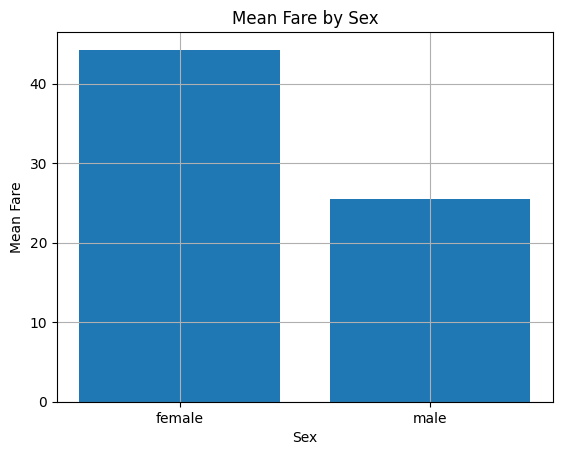

In [17]:
plt.bar(df_mean_fare_by_sex.index, df_mean_fare_by_sex.values)
plt.title('Mean Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Mean Fare')
plt.grid()
plt.show()

AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?